In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers
!pip install sentence-transformers
!pip install llama-index
!pip install matplotlib
!pip install pillow
!pip install requests


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
INFO: pip is looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 148.0 MB/s  0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
   ━━━━━

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 999, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/install/wheel.py", line 33, in <module>
    from pip._vendor.distlib.scripts import ScriptMaker
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/distlib/scripts.py", line 17, in <module>
^C


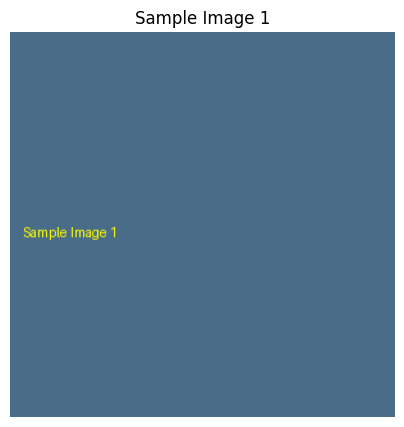

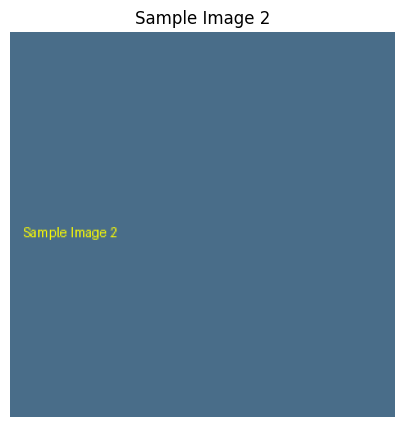

In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

images = []

# Generate 2 simple placeholder images
for i in range(2):
    img = Image.new('RGB', (300, 300), color = (73, 109, 137))
    d = ImageDraw.Draw(img)
    d.text((10,150), f"Sample Image {i+1}", fill=(255,255,0))
    images.append(img)

# Display images
for i, img in enumerate(images):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Sample Image {i+1}")
    plt.show()


In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BlipProcessor, BlipForConditionalGeneration
import torch

# Load BLIP model for image captioning (works as LLaVA backbone)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

for i, img in enumerate(images):
    inputs = processor(images=img, return_tensors="pt").to(device)
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    print(f"Image {i+1} caption: {caption}")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Image 1 caption: a blue background with the words sample sample sample sample sample sample sample sample sample sample sample sample sample
Image 2 caption: a blue background with the words sample sample sample sample sample sample sample sample sample sample sample sample sample


Saving VB.png to VB.png


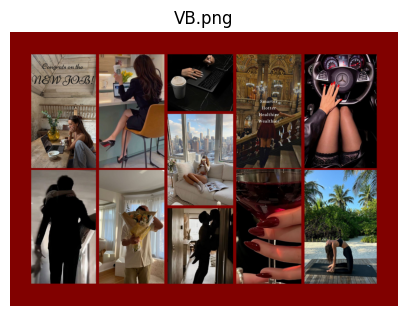

In [5]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()  # this will prompt you to select a file

images = []
for fn in uploaded.keys():
    img = Image.open(fn).convert("RGB")
    images.append(img)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(fn)
    plt.show()


In [6]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Load BLIP model for image captioning
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Generate captions for uploaded images
for i, img in enumerate(images):
    inputs = processor(images=img, return_tensors="pt").to(device)
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    print(f"Image {i+1} caption: {caption}")


Image 1 caption: a col of pictures of a woman in a room


In [7]:
!pip freeze > requirements.txt
